In [1]:
!pip install rakun2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 725.4/725.4 KB 12.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 32.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 22.9 MB/s eta 0:00:00
  Created wheel for rakun2: filename=rakun2-0.25-py3-none-any.whl size=933179 sha256=0649b7a543cf4cdea92e65e6750bd1e8e2fd5b9172f4f23cfc78a5c73b9ff58e
  Stored in directory: /root/.cache/pip/wheels/33/6e/94/01a2453fc88240862664d0b959e2e5c215797c606a7d4b610b
Successfully built rakun2
  Attempting uninstall: Pillow
    Found existing installation: Pillow 8.4.0
    Uninstalling Pillow-8.4.0:
      Successfully uninstalled Pillow-8.4.0


In [1]:
!pip install keybert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 63.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 43.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 KB 28.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 86.8 MB/s eta 0:00:00
  Created wheel for keybert: filename=keybert-0.7.0-py3-none-any.whl size=23794 sha256=acd48c7bea83e746f30910f1c45f8756f241b9e72b55b6e37fcde93d0863ed81
  Stored in directory: /root/.cache/pip/wheels/68/aa/41/82025d89b0eb97484c9ac7d527abf596765c41733af79f86b0
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125942 sha256=e55afecfafc853a7c2e4260b469f7527e048e605419b33

In [2]:
!pip install keyphrase_vectorizers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.1/192.1 KB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 68.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 74.9 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.27.4
    Uninstalling transformers-4.27.4:
      Successfully uninstalled transformers-4.27.4


In [3]:
!pip install yake


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.2/60.2 KB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 24.1 MB/s eta 0:00:00


In [4]:
import re
import os, os.path
import fnmatch
import json
import collections
import glob
import json

import matplotlib.pyplot as plt
import numpy as np
# import modules for web scrapping
import requests
from bs4 import BeautifulSoup

# import modules for web scrapping
import requests
from bs4 import BeautifulSoup

In [5]:
book = "nelson_autobiography"
startdate = 1700
enddate = 2020

In [6]:
from google.colab import files
from zipfile import ZipFile

# with ZipFile(files.upload(), 'r') as zip:
#   zip.extractall()
#   print('Done')
file_name = rf"/content/{book}.zip"

with ZipFile(file_name, 'r') as zipf:
  zipf.extractall()
  print('Done')

Done


In [7]:
from keyphrase_vectorizers import KeyphraseCountVectorizer
from keybert import KeyBERT
import yake
from rakun2 import RakunKeyphraseDetector


def get_keyword_bert(docs):
    vectorizer = KeyphraseCountVectorizer(pos_pattern= '<N.*>+')
    kw_model = KeyBERT()
    onewords = kw_model.extract_keywords(docs=docs, vectorizer=vectorizer,top_n=5,stop_words='english')
    return onewords

def get_keyword_yake(docs):
    kw_extractor = yake.KeywordExtractor(lan="en", n=3, windowsSize=3,top = 5)
    keywords = kw_extractor.extract_keywords(docs)
    return keywords

def get_keyword_rakun(docs):
  hyperparameters = {"num_keywords": 5,
                   "merge_threshold": 1.1,
                   "alpha": 0.3,
                   "token_prune_len": 3}

  keyword_detector = RakunKeyphraseDetector(hyperparameters)
  out_keywords = keyword_detector.find_keywords(docs, input_type="string")
  return out_keywords



In [8]:
dir_path = rf"/content/{book}/part"
rootdir = rf"/content/{book}/"
part = 1
mp_bert, mp_yake, mp_rakun = {}, {}, {}
for path in glob.glob(f'{rootdir}/*/**/', recursive=True):
    x = 1
    no_of_chapters = len(fnmatch.filter(os.listdir(dir_path + str(part) + '/'), '*.txt'))
    print(no_of_chapters)
    while x <= no_of_chapters:
        target_x = no_of_chapters+1
        for i in range(x,target_x):
            with open(dir_path + str(part) + '/chapter'+ str(i) + '.txt', 'r', encoding='utf-8') as content_file:
                key = str(part) + '/chapter'+ str(i)                
                content = content_file.read()
                print(key)
                mp_bert[key] = get_keyword_bert(content)
                mp_yake[key] = get_keyword_yake(content)
                mp_rakun[key] = get_keyword_rakun(content)
        x = target_x
        part += 1

115
1/chapter1


2023-04-08 04:50:56,542 - KeyphraseVectorizer - INFO - It looks like you do not have downloaded a list of stopwords yet. It is attempted to download the stopwords now.
INFO:KeyphraseVectorizer:It looks like you do not have downloaded a list of stopwords yet. It is attempted to download the stopwords now.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


1/chapter2
1/chapter3
1/chapter4
1/chapter5
1/chapter6
1/chapter7
1/chapter8
1/chapter9
1/chapter10
1/chapter11
1/chapter12
1/chapter13
1/chapter14
1/chapter15
1/chapter16
1/chapter17
1/chapter18
1/chapter19
1/chapter20
1/chapter21
1/chapter22
1/chapter23
1/chapter24
1/chapter25
1/chapter26
1/chapter27
1/chapter28
1/chapter29
1/chapter30
1/chapter31
1/chapter32
1/chapter33
1/chapter34
1/chapter35
1/chapter36
1/chapter37
1/chapter38
1/chapter39
1/chapter40
1/chapter41
1/chapter42
1/chapter43
1/chapter44
1/chapter45
1/chapter46
1/chapter47
1/chapter48
1/chapter49
1/chapter50
1/chapter51
1/chapter52
1/chapter53
1/chapter54
1/chapter55
1/chapter56
1/chapter57
1/chapter58
1/chapter59
1/chapter60
1/chapter61
1/chapter62
1/chapter63
1/chapter64
1/chapter65
1/chapter66
1/chapter67
1/chapter68
1/chapter69
1/chapter70
1/chapter71
1/chapter72
1/chapter73
1/chapter74
1/chapter75
1/chapter76
1/chapter77
1/chapter78
1/chapter79
1/chapter80
1/chapter81
1/chapter82
1/chapter83
1/chapter84
1/chapter85


In [9]:
with open(rf"mp_{book}_bert.json", "w") as outfile:
    json.dump(mp_bert, outfile)

with open(rf"mp_{book}_yake.json", "w") as outfile:
    json.dump(mp_yake, outfile)

with open(rf"mp_{book}_rakun.json", "w") as outfile:
    json.dump(mp_rakun, outfile)

In [10]:
mp_combined = {}
for k in mp_rakun.keys():
  k1 = set([v[0] for v in mp_bert[k]])
  k2 = set([v[0] for v in mp_yake[k]])
  k3 = set([v[0] for v in mp_rakun[k]])
  mp_combined[k] = k1.union(k2,k3)

# mp_combined
for k,v in mp_combined.items():
  print(len(v))

15
15
15
14
14
15
15
13
14
15
15
15
15
15
15
15
15
15
14
15
15
15
15
15
15
14
15
14
15
15
15
15
15
14
15
15
15
14
15
15
14
15
15
15
14
15
15
15
15
12
15
14
15
15
15
14
14
14
14
15
14
14
14
13
15
13
15
15
15
15
15
13
15
15
15
15
15
15
15
15
13
15
13
15
15
15
15
15
15
15
15
15
15
15
15
14
15
15
15
14
14
15
15
15
15
14
14
15
15
15
15
15
15
12
14


In [11]:
keyword_to_chap = collections.defaultdict(list)
for key,list_val in mp_combined.items():
    for val in list_val:
        keyword_to_chap[val].append(key)


final_keywords = set()
all_keywords = list(mp_combined.values())
for i in all_keywords:
    for val in i:
            final_keywords.add(val)
print(final_keywords)   
print(len(final_keywords))

{'violence continued', 'dormitory', 'bantu holomisa', 'photo album', 'hunger strikes', 'press conferences', 'judge rumpff', 'Sisulu or Kathrada', 'CONTACT with Kobie', 'branch meetings', 'regarded', 'constitutional convention', 'student body', 'tea', 'africa', 'told', 'meeting', 'prison staff', 'communism act', 'traditional warriors', 'fugitive', 'liberation struggle', 'prevent rupture', 'initiated conversations', 'white South Africa', 'financial difficulties', 'miners', 'guerrilla armies', 'learned', 'Synagogue opened', 'responsibility', 'responded magnificently', 'militancy', 'oppressed people', 'circumstances', 'Freedom Charter', 'van der Merwe', 'south africa', 'lieutenant colonel gawie marx', 'Group Areas Act', 'annual conference', 'hunger strike', 'Berrangé read Murray', 'secretary', 'danced and called', 'album', 'family matters', 'Prison', 'matter', 'written statement', 'articled clerk', 'memoir', 'marching in unison', 'guerrilla warfare', 'bantu authorities act', 'begun to unra

In [12]:
def get_year_to_content():
    dir_path = rf"/content/{book}/part"
    rootdir =rf"/content/{book}/"
    date_dict = {}
    year_mode_dict = {}
    # for part in range(1,Parts+1):
    part = 1
    for path in glob.glob(f'{rootdir}/*/**/', recursive=True):
        x = 1
        #print("part:" + str(part))
        date_dict[str(part)] = {}
        year_mode_dict[str(part)] = {}
        #print(dir_path + str(part) + '/')
        no_of_chapters = len(fnmatch.filter(os.listdir(dir_path + str(part) + '/'), '*.txt'))
    #     print('no.of_chapters:' + str(no_of_chapters))
        while x <= no_of_chapters:
            target_x = no_of_chapters+1
            for i in range(x,target_x):
                #print("chapter:" + str(i))
                with open(dir_path + str(part) + '/chapter'+ str(i) + '.txt', 'r', encoding='utf-8') as content_file:
                    content = content_file.read()

                regex= "\d{4}"
                dates = re.findall(regex, content)
                mdates = []
                year_list = []
                try:
                    for date in dates:
                        if int(date) <= enddate and int(date) >= startdate:                    
                            #print date
                            year_list.append(date)
                            mdates.append(date)                       
                except:
                    pass
                date_dict[str(part)][str(i)] = mdates
                try:
                    year_mode_dict[str(part)][str(i)] = max(set(year_list), key=year_list.count)
                except:
                    year_mode_dict[str(part)][str(i)] = -1
            x = target_x
            part += 1

    # assigning chapter the date with closest chapter
    def closest(lst, K):
        if lst:
          return lst[min(range(len(lst)), key = lambda i: abs(lst[i]-K))]
        else:
          return -1


    #for part in range(1,Parts+1):
    part = 1
    for path in glob.glob(f'{rootdir}/*/**/', recursive=True):
        x = 1
        # checking which chapters has date assigned
        no_of_chapters = len(fnmatch.filter(os.listdir(dir_path + str(part) + '/'), '*.txt'))
        chapters_with_date = []
        while x <= no_of_chapters:
            target_x = no_of_chapters+1
            for i in range(x,target_x):
                # print("chapter:" + str(i))
                if year_mode_dict[str(part)][str(i)] != -1:
                    chapters_with_date.append(i)
            x = target_x
        x = 1
        # assigning date to chapter which is closest to it
        while x <= no_of_chapters:
            target_x = no_of_chapters+1
            for i in range(x,target_x):
                #print("chapter:" + str(i))
                k = closest(chapters_with_date,i)
                #print("K:",k)
                year_mode_dict[str(part)][str(i)] = year_mode_dict[str(part)][str(k)]
            x = target_x
        part += 1

    year_to_chap = collections.defaultdict(list)  # year -> list of folder paths
    for key in year_mode_dict.keys():
        folder = f"{key}"
        for k2 in year_mode_dict[key].keys():
            file = folder
            file += f"/chapter{k2}"
            val = year_mode_dict[key][k2]
            year_to_chap[val].append(file)

    return year_to_chap

year_to_chap = get_year_to_content()

keys = []
for k in list(keyword_to_chap.keys()):
    keys.append(k.title().replace(" ", "_"))
keyword_to_chap2 = dict(zip(keys, list(keyword_to_chap.values())))

# year_to_chap
chap_to_year = {}
for k,v in year_to_chap.items():
    for l in v:
        chap_to_year[l]= int(k)
# chap_to_year
keyword_to_year = collections.defaultdict(set)
for k,v in keyword_to_chap.items():
    for l in v:
        keyword_to_year[k.title().replace(" ", "_")].add(chap_to_year[l])
# print(keyword_to_year)

key_yr_chap_mp = collections.defaultdict(list)
for k,v in keyword_to_chap2.items():
    for chap in v:
        key_yr_chap_mp[k+'_'+str(chap_to_year[chap])].append(chap)
print(key_yr_chap_mp)

defaultdict(<class 'list'>, {'Rebelliousness_Stubborn_1832': ['1/chapter1'], 'House_1832': ['1/chapter1'], 'House_1993': ['1/chapter111'], 'Zulu_1832': ['1/chapter1'], 'Left_Hand_House_1832': ['1/chapter1'], 'Thembu_1832': ['1/chapter1'], 'Father_Response_1832': ['1/chapter1'], 'Genealogy_1832': ['1/chapter1'], 'Straitened_Circumstances_1832': ['1/chapter1'], 'Rolihlahla_1832': ['1/chapter1'], 'Mandela_Family_Chieftainship_1832': ['1/chapter1'], 'Birth_1832': ['1/chapter1'], 'Acknowledged_Custodian_1832': ['1/chapter1'], 'Territorial_Divisions_1832': ['1/chapter1'], 'Father_1832': ['1/chapter1'], 'Father_1820': ['1/chapter3'], 'Father_1975': ['1/chapter77'], 'Father_1992': ['1/chapter109'], 'Hand_House_1832': ['1/chapter1'], 'Appeared_As_Grand_1820': ['1/chapter2'], 'Grassy_Valley_Crisscrossed_1820': ['1/chapter2'], 'Neighboring_Villages_1820': ['1/chapter2'], 'Sisters_1820': ['1/chapter2'], 'Village_1820': ['1/chapter2'], 'Youthful_Approximation_1820': ['1/chapter2'], 'Ancestors_1820'

In [13]:
from sentence_transformers import SentenceTransformer, util
import torch

embedder = SentenceTransformer('all-MiniLM-L6-v2')

def create_representative_doc(corpus,query):
    corpus_embeddings = embedder.encode(corpus, convert_to_tensor=True)
    query_embedding = embedder.encode(query, convert_to_tensor=True)
    
    cos_scores = util.cos_sim(query_embedding, corpus_embeddings)[0]
    paragraph = ""
    for i,score in enumerate(cos_scores):
        if score >0.40:
            paragraph += (corpus[i]+'.')

    return paragraph

In [14]:
key_yr_chap_mp

defaultdict(list,
            {'Rebelliousness_Stubborn_1832': ['1/chapter1'],
             'House_1832': ['1/chapter1'],
             'House_1993': ['1/chapter111'],
             'Zulu_1832': ['1/chapter1'],
             'Left_Hand_House_1832': ['1/chapter1'],
             'Thembu_1832': ['1/chapter1'],
             'Father_Response_1832': ['1/chapter1'],
             'Genealogy_1832': ['1/chapter1'],
             'Straitened_Circumstances_1832': ['1/chapter1'],
             'Rolihlahla_1832': ['1/chapter1'],
             'Mandela_Family_Chieftainship_1832': ['1/chapter1'],
             'Birth_1832': ['1/chapter1'],
             'Acknowledged_Custodian_1832': ['1/chapter1'],
             'Territorial_Divisions_1832': ['1/chapter1'],
             'Father_1832': ['1/chapter1'],
             'Father_1820': ['1/chapter3'],
             'Father_1975': ['1/chapter77'],
             'Father_1992': ['1/chapter109'],
             'Hand_House_1832': ['1/chapter1'],
             'Appeared_As_Gra

In [15]:
def split_sentence_from_text(key):
    file_loc = rf"/content/{book}/part%s.txt"%key
    text = ""
    with open(file_loc,encoding="utf8") as f:
        text = f.read()

    res = re.findall(r"[^.!?]+", text)
    return res

mp_key_doc = {}
for key,val in key_yr_chap_mp.items():
    mp_key_doc[key] = ""
    print(f"{key}")
    for k in val:
        corpus = split_sentence_from_text(k)
#         doc = create_representative_doc(corpus,key)
        mp_key_doc[key] += create_representative_doc(corpus,key)

# print(mp_key_doc)

Rebelliousness_Stubborn_1832
House_1832
House_1993
Zulu_1832
Left_Hand_House_1832
Thembu_1832
Father_Response_1832
Genealogy_1832
Straitened_Circumstances_1832
Rolihlahla_1832
Mandela_Family_Chieftainship_1832
Birth_1832
Acknowledged_Custodian_1832
Territorial_Divisions_1832
Father_1832
Father_1820
Father_1975
Father_1992
Hand_House_1832
Appeared_As_Grand_1820
Grassy_Valley_Crisscrossed_1820
Neighboring_Villages_1820
Sisters_1820
Village_1820
Youthful_Approximation_1820
Ancestors_1820
Fruits_And_Edible_1820
Huts_1820
Boy_1820
Village_Wore_1820
Stoop_To_Walk_1820
Farms_1820
Honey_And_Fruits_1820
Qunu_1820
Qunu_1950
Qunu_1993
Great_Place_1820
Tobacco_1820
Lung_Disease_1820
Chief_Joyi_1820
Councilors_Of_High_1820
Meeting_1820
Meeting_1950
Meeting_1989
Center_1820
Stick_Fighter_1820
Great_1820
Champion_Stick_1820
Wheezing_Cough_1820
Regent_1820
Regent_1825
Regent_1940
Attended_Church_1820
Grandpa_1820
Wheezing_And_Snorting_1825
River_1825
Childhood_1825
Circumcision_1825
Circumcision_Maste

In [16]:
with open(rf"mp_key_doc_{book}.json", "w") as outfile:
    json.dump(mp_key_doc, outfile)

In [17]:
url = 'https://en.wikipedia.org/wiki/Mahatma_Gandhi'
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}
response = requests.get(url, headers=headers)
#print(response.status_code)
soup = BeautifulSoup(response.content, 'html.parser')

desired_ids = []
for link in soup.find_all('span', attrs={'class':'mw-headline'}):
    if link.get('id') is not None: 
        desired_ids.append(link.get('id'))
print(desired_ids)

def FetchParagraphBetweenIds(id1,id2):
    hElem = soup.find("span", {'id': id1})
    endElem = soup.find('span', {'id': id2})
    cntns = list(soup.find_all())

    my_lst = []
    inBetween = False
    for tag in cntns:
        if tag == hElem:
            inBetween = True
        if inBetween == True and tag.name == 'p':
            my_lst.append(tag.get_text())
        if tag == endElem:
            inBetween = False
            break
    return "".join(my_lst)

id_to_paragraph = {}
for i in range(len(desired_ids)-1):
    id_to_paragraph[desired_ids[i]] = FetchParagraphBetweenIds(desired_ids[i],desired_ids[i+1])

['Biography', 'Early_life_and_background', 'Three_years_in_London', 'Student_of_law', 'Vegetarianism_and_committee_work', 'Called_to_the_bar', 'Civil_rights_activist_in_South_Africa_(1893–1914)', 'Europeans,_Indians_and_Africans', 'Struggle_for_Indian_independence_(1915–1947)', 'Role_in_World_War_I', 'Champaran_agitations', 'Kheda_agitations', 'Khilafat_movement', 'Non-co-operation', 'Salt_Satyagraha_(Salt_March)', 'Gandhi_as_folk_hero', 'Negotiations', 'Round_Table_Conferences', 'Congress_politics', 'World_War_II_and_Quit_India_movement', 'Partition_and_independence', 'Death', 'Funeral_and_memorials', 'Principles,_practices,_and_beliefs', 'Influences', 'Leo_Tolstoy', 'Shrimad_Rajchandra', 'Religious_texts', 'Sufism', 'On_wars_and_nonviolence', 'Wars', 'Truth_and_Satyagraha', 'Nonviolence', 'On_inter-religious_relations', 'Buddhists,_Jains_and_Sikhs', 'Muslims', 'Christians', 'Jews', 'On_life,_society_and_other_application_of_his_ideas', 'Vegetarianism,_food,_and_animals', 'Fasting', '

In [18]:
from sentence_transformers import SentenceTransformer, util
import torch

mp_sim_score = {}
embedder = SentenceTransformer('all-MiniLM-L6-v2')

for key1, val1 in id_to_paragraph.items():
    for key2,val2 in mp_key_doc.items():
        if val1 != '' and val2 != '':
            corpus_embeddings = embedder.encode(val1, convert_to_tensor=True)
            query_embedding = embedder.encode(val2, convert_to_tensor=True)
            cos_scores = util.cos_sim(query_embedding, corpus_embeddings)[0][0]
            mp_sim_score[str(key1)+'->'+str(key2)] = cos_scores
            # print(f"{key1} {key2} {cos_scores}")

In [19]:
mp_sim_score = {k: v.item() for k, v in mp_sim_score.items()}

with open(rf"mp_sim_score_{book}.json", "w") as outfile:
    json.dump(mp_sim_score, outfile)

In [21]:
import json
with open(f"mp_sim_score_{book}.json") as outfile:
    mp_sim_score = json.load(outfile)

In [22]:
def display_bar_plot(dict_t,title,xlab,ylab):
    plt.figure(figsize=(10,7))
    plt.bar(*zip(*dict_t.items()))
    plt.title(title)
    # plt.grid()
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.show()

In [23]:
mp_sim_score_bar_range = {}
a,b,c,d,e = 0,0,0,0,0
for k,v in mp_sim_score.items():
    if v<0:
        a += 1
    elif v>=0 and v<0.25:
        b+= 1
    elif v>=0.25 and v<0.5:
        c += 1
    elif v>=0.5 and v<0.75:
        d += 1
    elif v>= 0.75:
        e += 1
mp_sim_score_bar_range["<0"] = a
mp_sim_score_bar_range["0-0.25"] = b
mp_sim_score_bar_range["0.25-0.5"] = c
mp_sim_score_bar_range["0.5-0.75"] = d
mp_sim_score_bar_range["0.75-1"] = e


# display_bar_plot(mp_sim_score_bar_range,rf"similarity distribution for {book}","similarity","count")

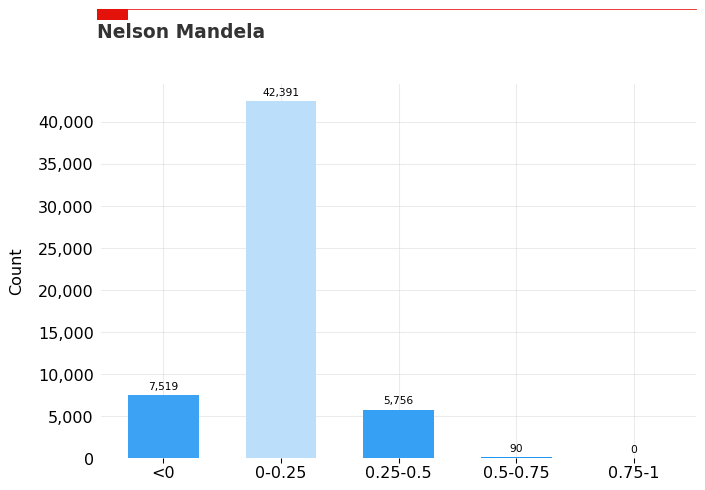

In [24]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import MaxNLocator

# Create the figure and axes objects, specify the size and the dots per inches
# delay_by_month['Month'], delay_by_month['ArrDelay'] ->  
# list(mp_sim_score_bar_range.keys()), list(mp_sim_score_bar_range.values())

fig, ax = plt.subplots(figsize=(8,6), dpi = 96)

# Plot bars
bar1 = ax.bar(list(mp_sim_score_bar_range.keys()), list(mp_sim_score_bar_range.values()),width=0.6)
# Create the grid 
ax.grid(which="major", axis='x', color='#DAD8D7', alpha=0.5, zorder=1)
ax.grid(which="major", axis='y', color='#DAD8D7', alpha=0.5, zorder=1)

# Reformat x-axis label and tick labels
ax.set_xlabel('', fontsize=12, labelpad=10) # No need for an axis label
ax.xaxis.set_label_position("bottom")
ax.xaxis.set_major_formatter(lambda s, i : f'{s:,.0f}')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.xaxis.set_tick_params(pad=2, labelbottom=True, bottom=True, labelsize=12, labelrotation=0)
labels = list(mp_sim_score_bar_range.keys())
ax.set_xticks(list(mp_sim_score_bar_range.keys()), labels) # Map integers numbers from the series to labels list

# Reformat y-axis
ax.set_ylabel('Count', fontsize=12, labelpad=10)
ax.yaxis.set_label_position("left")
ax.yaxis.set_major_formatter(lambda s, i : f'{s:,.0f}')
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_tick_params(pad=2, labeltop=False, labelbottom=True, bottom=False, labelsize=12)

# Add label on top of each bar
ax.bar_label(bar1, labels=[f'{e:,.0f}' for e in list(mp_sim_score_bar_range.values())], padding=3, color='black', fontsize=8) 

# Remove the spines
ax.spines[['top','left','right','bottom']].set_visible(False)

# Make the left spine thicker
ax.spines['right'].set_linewidth(1.1)

# Add in red line and rectangle on top
ax.plot([0.12, .9], [.98, .98], transform=fig.transFigure, clip_on=False, color='#E3120B', linewidth=.6)
ax.add_patch(plt.Rectangle((0.12,.98), 0.04, -0.02, facecolor='#E3120B', transform=fig.transFigure, clip_on=False, linewidth = 0))

# Add in title and subtitle
ax.text(x=0.12, y=.93, s="Nelson Mandela", transform=fig.transFigure, ha='left', fontsize=14, weight='bold', alpha=.8)
# ax.text(x=0.12, y=.90, s="between Wikipedia section content and Keyword focused paragraph", transform=fig.transFigure, ha='left', fontsize=12, alpha=.8)

# Set source text
# ax.text(x=0.1, y=0.12, s="Mahatma Gandhi", transform=fig.transFigure, ha='left', fontsize=10, alpha=.7)

# Adjust the margins around the plot area
plt.subplots_adjust(left=None, bottom=0.2, right=None, top=0.85, wspace=None, hspace=None)

# Set a white background
fig.patch.set_facecolor('white')

# Colours - Choose the extreme colours of the colour map
colours = ["#2196f3", "#bbdefb"]

# Colormap - Build the colour maps
cmap = mpl.colors.LinearSegmentedColormap.from_list("colour_map", colours, N=256)
norm = mpl.colors.Normalize(min(list(mp_sim_score_bar_range.values())), max(list(mp_sim_score_bar_range.values()))) # linearly normalizes data into the [0.0, 1.0] interval

# Plot bars
bar1 = ax.bar(list(mp_sim_score_bar_range.keys()), list(mp_sim_score_bar_range.values()), color=cmap(norm(list(mp_sim_score_bar_range.values()))), width=0.6, zorder=2)
fig.savefig(f"similarity_distribution_{book}.png")

In [25]:
from statistics import median
def fetch_single_date_from_content(content):
    regex= "\d{4}"
    dates = re.findall(regex, content)
    year_list = []
    res = -1
    try:
        for date in dates:
            if int(date) <= enddate and int(date) >= startdate:                    
                #print date
                year_list.append(int(date))
    except:
        pass
    if year_list:
        # res = max(set(year_list), key=year_list.count)
        res = median(year_list)
    return int(res)
    
wiki_section_date = {}
for k,v in id_to_paragraph.items():
#     print(fetch_dates_from_content(v))
    wiki_section_date[k] = fetch_single_date_from_content(v)
print(wiki_section_date)

{'Biography': -1, 'Early_life_and_background': 1885, 'Three_years_in_London': -1, 'Student_of_law': 1888, 'Vegetarianism_and_committee_work': 1901, 'Called_to_the_bar': 1893, 'Civil_rights_activist_in_South_Africa_(1893–1914)': 1897, 'Europeans,_Indians_and_Africans': 1908, 'Struggle_for_Indian_independence_(1915–1947)': 1930, 'Role_in_World_War_I': 1916, 'Champaran_agitations': 1917, 'Kheda_agitations': 1918, 'Khilafat_movement': 1919, 'Non-co-operation': 1919, 'Salt_Satyagraha_(Salt_March)': 1928, 'Gandhi_as_folk_hero': 1905, 'Negotiations': 1931, 'Round_Table_Conferences': 1931, 'Congress_politics': 1936, 'World_War_II_and_Quit_India_movement': 1944, 'Partition_and_independence': 1947, 'Death': 1948, 'Funeral_and_memorials': 1948, 'Principles,_practices,_and_beliefs': -1, 'Influences': 1892, 'Leo_Tolstoy': 1909, 'Shrimad_Rajchandra': 1930, 'Religious_texts': 1930, 'Sufism': -1, 'On_wars_and_nonviolence': -1, 'Wars': 1918, 'Truth_and_Satyagraha': 1932, 'Nonviolence': 1943, 'On_inter-

In [26]:
# keeping a threshold
mp_sim_score_50 = {}
for key,val in mp_sim_score.items():
    if val >= 0.30:
        mp_sim_score_50[key] = val

        
# section wise hyperlink
section_wise_keyword = collections.defaultdict(set)
for k,v in mp_sim_score_50.items():
    section_name, keyword = k.split('->')[0],k.split('->')[1]
    section_wise_keyword[section_name].add(keyword.title().replace(" ", "_"))
    
# section_wise_keyword
mixed_sim_score = {}
date_diff = 0
for k,v in section_wise_keyword.items():
    for elem in v:
        key = k+'->'+elem
        d_k = int(elem[elem.rindex('_')+1:])
        d_w = wiki_section_date[k]
#         print(f"{d_k}    {d_w}")
        if d_w == -1: date_diff = enddate-startdate
        else: date_diff = abs(d_k-d_w)+1
        date_score = 1/date_diff
        sim_score = mp_sim_score_50[key]
        rank = 0.5*date_score + 0.5*sim_score
        mixed_sim_score[key] = rank

## Keyword Filteration 1

In [27]:
section_wise_keyword_filtered = collections.defaultdict(list)
for k,v in mixed_sim_score.items():
    section_name, keyword = k.split('->')[0],k.split('->')[1]
    section_wise_keyword_filtered[section_name].append((keyword.title().replace(" ", "_"),v))

final_kw = set()

for k,v in section_wise_keyword_filtered.items():
  for ele in v:
    final_kw.add(ele[0])
# print(final_kw)
print(len(final_kw))

# initialization
kw_max_score = {}
for k in final_kw:
  kw_max_score[k] = 0

for k,v in section_wise_keyword_filtered.items():
  for ele in v:
    kw_max_score[ele[0]] = max(kw_max_score[ele[0]], ele[1])
# print(kw_max_score)


435


In [28]:
for k,v in section_wise_keyword_filtered.items():
  print(f"{k}   ->  {len(v)}")

Early_life_and_background   ->  31
Student_of_law   ->  28
Vegetarianism_and_committee_work   ->  46
Called_to_the_bar   ->  115
Civil_rights_activist_in_South_Africa_(1893–1914)   ->  203
Europeans,_Indians_and_Africans   ->  216
Struggle_for_Indian_independence_(1915–1947)   ->  22
Role_in_World_War_I   ->  57
Champaran_agitations   ->  24
Kheda_agitations   ->  79
Khilafat_movement   ->  96
Non-co-operation   ->  71
Salt_Satyagraha_(Salt_March)   ->  66
Gandhi_as_folk_hero   ->  61
Negotiations   ->  168
Round_Table_Conferences   ->  108
Congress_politics   ->  46
World_War_II_and_Quit_India_movement   ->  67
Partition_and_independence   ->  54
Death   ->  42
Funeral_and_memorials   ->  3
Principles,_practices,_and_beliefs   ->  26
Influences   ->  6
Leo_Tolstoy   ->  52
Shrimad_Rajchandra   ->  11
Religious_texts   ->  6
Sufism   ->  4
Wars   ->  163
Truth_and_Satyagraha   ->  7
Nonviolence   ->  69
Buddhists,_Jains_and_Sikhs   ->  4
Muslims   ->  15
Christians   ->  39
Jews   ->  

In [29]:
mp_final_kw = collections.defaultdict(list)
for k,v in section_wise_keyword_filtered.items():
  mp = {}
  for ele in v:
    mp[ele[0]] = ele[1]
  for ele in v:
    if mp[ele[0]] == kw_max_score[ele[0]]:
      mp_final_kw[k].append(ele)

# mp1 = {}
# for k,v in mp_final_kw.items():
#   mp1[k] = len(v)
#   # print(f"{k}   ->  {len(v)}")

# print(mp1)

In [30]:
# section_wise_keyword_filtered
section_wise_keyword_sort =  collections.defaultdict(list)
for k ,v in mp_final_kw.items():
    if len(v)>=5:
        section_wise_keyword_sort[k] = sorted(v,key = lambda x:x[1],reverse = True)[:5]
    else:
        section_wise_keyword_sort[k] = sorted(v,key = lambda x:x[1],reverse = True)
        
section_wise_keyword_sort_only = collections.defaultdict(list)
for k,v in section_wise_keyword_sort.items():
    section_wise_keyword_sort_only[k] = [ele[0] for ele in v]
    
for k,v in section_wise_keyword_sort_only.items():
    print(f"{k}  ->   {v}")
mp1 = {}
for k,v in section_wise_keyword_sort_only.items():
  mp1[k] = len(v)
  # print(f"{k}   ->  {len(v)}")

print(mp1)

Early_life_and_background  ->   ['Chief_Mangosuthu_Buthelezi_1879', 'Chief_Buthelezi_1879', 'Zulu_King_1879', 'Mandela_Family_Chieftainship_1832', 'Deputy_President_1912']
Vegetarianism_and_committee_work  ->   ['Reverend_1825', 'Clarkebury_1825', 'Harris_1825', 'Councilors_Of_High_1820', 'Regent_1825']
Called_to_the_bar  ->   ['Return_To_Natal_1954', 'Johannesburg_District_1953', 'African_Law_Firms_1952', 'Law_Firm_1952', 'Traveling_Documents_1940']
Civil_rights_activist_in_South_Africa_(1893–1914)  ->   ['Harassment_1966', 'Durban_Command_1962', 'Durban_1962', 'Commanding_Officer_1963', 'Pretoria_1962']
Europeans,_Indians_and_Africans  ->   ['Apartheid_1912', 'African_National_Congress_1912', 'Apartheid_1956', 'Apartheid_Structures_1956', 'Apartheid_1879']
Struggle_for_Indian_independence_(1915–1947)  ->   ['Separation_Of_Powers_1961']
Role_in_World_War_I  ->   ['Guerrilla_Warfare_1961', 'Guerrilla_War_1961', 'Guerrilla_Armies_1961', 'Military_Training_1967', 'Armed_Struggle_1990']
K

In [31]:
# top_mp_final_kw = collections.defaultdict(list)
# for k,v in mp_final_kw.items():
#   for ele in v:
#     if ele[1]>0.50:
#       print(ele)
#       top_mp_final_kw[k].append(ele)

# mp1 = {}
# for k,v in top_mp_final_kw.items():
#   mp1[k] = len(v)

# print(mp1)

In [32]:
# for k,v in section_wise_keyword_filtered.items():
#   mp = {}
#   for ele in v:
#     mp[ele[0]] = ele[1]

#   for ele in v:
#     if mp[ele[0]]  != kw_max_score[ele[0]]:
#       section_wise_keyword_filtered[k].remove(ele)

# for k,v in section_wise_keyword_filtered.items():
#   print(f"{k}   ->  {len(v)}")

In [33]:
with open(rf"filtered_kw_{book}.json", "w") as outfile:
    json.dump(mp_final_kw, outfile)

In [34]:
def kw_2_nrml(s1):
  temp = s1[:s1.rindex('_')]
  a = temp.split('_')
  # for i,v in enumerate(a):
  #     a[i] = v.lower()
      
  val = " ".join(a)
  return val
  
def find_freq(key,txt):
    reg = f"(?i){key}"
    return len(re.findall(rf"(?i){key}", txt))

temp = []
multitimekws = []
for k in final_kw:
  temp.append(kw_2_nrml(k))

mp = collections.Counter(temp)
for k,v in mp.items():
  if v>1:
    multitimekws.append(k)

print(multitimekws)
print(len(multitimekws))

section_to_num = {}  # this dict will store num of keywords which are present in keywords as a simple text
for k,v in section_wise_keyword_sort.items():
  cnt = set()
  for ele in v:
    temp = kw_2_nrml(ele[0])
    if find_freq(temp,id_to_paragraph[k])>0: #and temp not in multitimekws:
      cnt.add(temp)
  section_to_num[k] = cnt

mp2 = {}
for k,v in section_to_num.items():
  mp2[k] = len(v)

print(mp2)

['South Africans', 'Liberation Movement', 'Imperialism', 'Political Prisoners', 'Pan Africanist Congress', 'Apartheid', 'Interim Government', 'Zambia', 'Transvaal', 'Protest', 'Winnie', 'Hunger Strike', 'Law Society', 'Passive Resistance', 'Anc Leaders', 'Johannesburg', 'Renounce Violence', 'Guerrilla Warfare', 'Armed Struggle', 'African National Congress', 'Deputy President', 'Commanding Officer', 'Afrikaner', 'Africa', 'Nonviolence', 'Demonstrators', 'Kwazulu Government', 'Liberation Struggle', 'Constituent Assembly', 'Prisoners', 'Majority Rule', 'Separate Development', 'Military Training', 'Afrikaners', 'South Africa', 'Klerk', 'Free Mandela']
37
{'Early_life_and_background': 0, 'Vegetarianism_and_committee_work': 0, 'Called_to_the_bar': 0, 'Civil_rights_activist_in_South_Africa_(1893–1914)': 1, 'Europeans,_Indians_and_Africans': 1, 'Struggle_for_Indian_independence_(1915–1947)': 0, 'Role_in_World_War_I': 0, 'Kheda_agitations': 1, 'Khilafat_movement': 0, 'Non-co-operation': 0, 'Sal

In [35]:
print(sum(list(mp2.values())))

13


In [36]:
def FetchURLSBetweenIds(id1,id2):
    hElem = soup.find("span", {'id': id1})
    endElem = soup.find('span', {'id': id2})
    cntns = list(soup.find_all())
    linkToScrape = []
    inBetween = False
    for tag in cntns:
        if tag == hElem:
            inBetween = True
        if inBetween == True and tag.name == 'p':
#             my_lst.append(tag.get_text())
            allLinks = tag.find_all('a')
            
            for link in allLinks:
                if link.get('href') is not None and link.get('href').find("/wiki/")== 0: 
                    linkToScrape.append(link['href'].replace('/wiki/',""))
        if tag == endElem:
            inBetween = False
            break
    return set(linkToScrape)

mp_urls_section_mp  = {}
for i in range(len(desired_ids)-1):
    mp_urls_section_mp[desired_ids[i]] = FetchURLSBetweenIds(desired_ids[i],desired_ids[i+1])

# print(mp_urls_section_mp)

sec_2_common_link = {}
for k,v in section_wise_keyword_sort.items():
  couldbelinks = set()
  for ele in v:
    s1 = ele[0]
    couldbelinks.add(s1[:s1.rindex('_')])
  sec_2_common_link[k] = mp_urls_section_mp[k].intersection(couldbelinks)

print(sec_2_common_link)
# print(sum(list(sec_2_common_link.values())))
mp3 = {}
for k,v in sec_2_common_link.items():
  mp3[k] = len(v)

print(mp3)
print(sum(list(mp3.values())))

{'Early_life_and_background': set(), 'Vegetarianism_and_committee_work': set(), 'Called_to_the_bar': set(), 'Civil_rights_activist_in_South_Africa_(1893–1914)': {'Durban'}, 'Europeans,_Indians_and_Africans': {'Apartheid'}, 'Struggle_for_Indian_independence_(1915–1947)': set(), 'Role_in_World_War_I': set(), 'Kheda_agitations': set(), 'Khilafat_movement': set(), 'Non-co-operation': set(), 'Salt_Satyagraha_(Salt_March)': set(), 'Negotiations': set(), 'Round_Table_Conferences': set(), 'Congress_politics': set(), 'World_War_II_and_Quit_India_movement': set(), 'Partition_and_independence': set(), 'Death': set(), 'Funeral_and_memorials': set(), 'Principles,_practices,_and_beliefs': set(), 'Leo_Tolstoy': set(), 'Wars': set(), 'Nonviolence': set(), 'Christians': set(), 'Fasting': set(), 'Women': set(), 'Brahmacharya:_abstinence_from_sex_and_food': set(), 'Untouchability_and_castes': set(), 'Nai_Talim,_basic_education': set(), 'Swaraj,_self-rule': set(), 'Gandhian_economics': set(), 'Gandhism': 

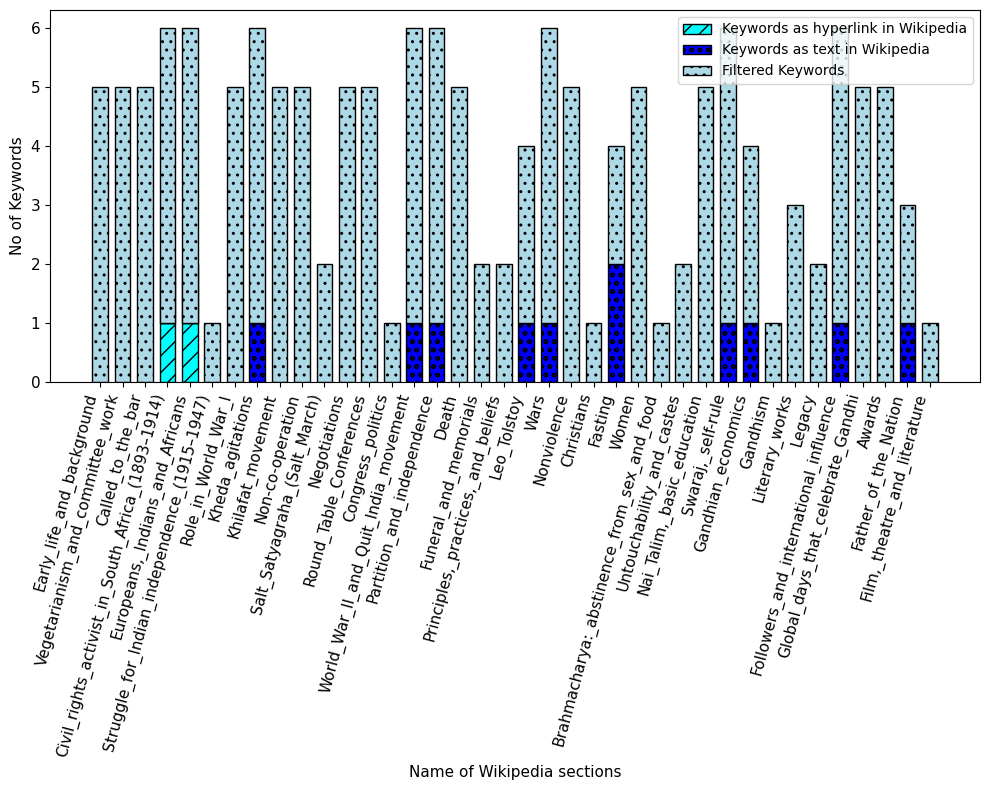

In [37]:
#Plot has been done for the tag has greater than 1 value
from matplotlib import pyplot as plt
fig = plt.figure(figsize = (10, 8))

x = list(mp3.keys())
y1 = list(mp3.values())
y2 = list(mp2.values())
y3 = list(mp1.values())

plt.bar(x, y1, width=0.7, color ='#00FFFF', hatch= "//", edgecolor = "black")
plt.bar(x, y2, bottom=y1, width=0.7, color ='blue', hatch= "oo", edgecolor = "black")
plt.bar(x, y3, bottom=y2, width=0.7, color ='lightblue', hatch= "..", edgecolor = "black")

plt.xlabel("Name of Wikipedia sections", fontsize=11, y= -0.1)
#plt.ylabel("Ratio of the duplicate question\n to the all question associated\n with the particular tag", fontsize=14)
plt.ylabel("No of Keywords", fontsize=11)
#plt.title("Students enrolled in different courses")
plt.xticks(rotation=75, fontsize=11, ha="right")
plt.yticks(fontsize=11)
plt.legend(["Keywords as hyperlink in Wikipedia", "Keywords as text in Wikipedia", "Filtered Keywords"])

#plt.show()
plt.tight_layout()
plt.savefig(f"kw_dist_wiki_sec_{book}.png")

# Wikipedia Page Creation
I am targeting the keywords which are present in wikipedia as a text but no hyperlinks are present and timed keywords that are present in different wikipedia section but in different year

In [38]:
final_keywords = set()
for k,v in section_wise_keyword_sort_only.items():
    for s1 in v:
        final_keywords.add(s1[:s1.rindex('_')])
# key_yr_chap_mp
print(final_keywords)

{'White_South_Africans', 'Boer_War', 'Cape', 'Prison_Conditions', 'Chief_Buthelezi', 'Primitive_And_Insecure', 'Violence', 'Inferiority_Complex', 'South_African_History', 'Passive_Resistance', 'De_Klerk', 'Hunger_Strikes', 'Free_Mandela_Committee', 'Afrikaners', 'Councilors_Of_High', 'Transkei_Matters', 'Life_Comrade_Nomzamo', 'South_African_Indian', 'Hunger_Strike', 'Transvaal', 'Secondary_Schools', 'Johannesburg', 'Berrangé_Read_Murray', 'National_Constitutional', 'Law_Firm', 'Blacks', 'Durban', 'Feudalism_To_Capitalism', 'Philosophy_Africanism', 'Apartheid_Targets', 'Ethiopia', 'Resistance_Campaign', 'Parliamentary_Representation', 'Clarkebury_Students', 'Socialism', 'Dialectical_Materialism', 'Durban_Command', 'Societies_To_Feudalism', 'Renounce_Violence', 'Reverend', 'Foreign_Politicians', 'Comrade_Nomzamo_Winnie_Mandela', 'Jimmy_Kruger', 'Letter', 'Industrialization_Democratized', 'Freedom_Struggle', 'Harassment', 'Criminals_Masquerading', 'Africa', 'Foreign_Ideologies', 'Klerk',

In [39]:
allLinks = soup.find(id="bodyContent").find_all("a")
linkToScrape = []
for link in allLinks:
    if link.get('href') is not None and link.get('href').find("/wiki/")== 0: 
        linkToScrape.append(link)

print(len(linkToScrape))
# print the urls of linkToScrape
# https://en.wikipedia.org/wiki/Nationalism#Anti-colonial_nationalism
# url = "https://en.wikipedia.org"
urls = set()
for link in linkToScrape:
    urls.add(link['href'].replace('/wiki/',""))
print(urls)
     

3709
{'Fruitarianism', 'White_South_Africans', 'Legume', 'Martin_Balluch', 'The_Most_Important_People_of_the_Century', 'Nagaland_Pradesh_Congress_Committee', 'Category:Articles_with_BIBSYS_identifiers', 'Azad_Hind', 'Chandra_Shekhar_Azad', 'Kerala_Pradesh_Congress_Committee', 'Bombay', 'Satyashodhak_Samaj', 'Ram_Dass', 'Whitehouse.gov', 'Philip_Glass', 'Tamil_language', 'John_Sirica', 'Help:CS1_errors#citation_missing_title', 'Category:Articles_with_BNF_identifiers', 'Womesh_Chunder_Bonnerjee', 'Sahajanand_Saraswati', 'International_Vedanta_Society', 'The_Hindu', 'Hind_Swaraj_or_Indian_Home_Rule', 'Mahatma_Gandhi_Marine_National_Park', 'Harishchandra', 'Daniel_H._Kress', 'Franklin_D._Roosevelt', 'E._F._Schumacher', 'Satya_(magazine)', 'Odisha_Pradesh_Congress_Committee', 'Political_integration_of_India', 'Gandhi_Jayanti', 'File:P_religion_world.svg', 'National_Salt_Satyagraha_Memorial', 'Robert_Owen', 'Bhavnagar_State', 'Sadharan_Brahmo_Samaj', 'Helena_Blavatsky', 'Gandhigiri', 'Arrang

In [40]:
hyperlinks_present = final_keywords & set(urls)
print(hyperlinks_present)
len(hyperlinks_present)

{'White_South_Africans', 'Boer_War', 'Apartheid', 'Johannesburg', 'Protest', 'Pretoria', 'Durban', 'Socialism'}


8

In [41]:
final_keywords = set()
for k,v in section_wise_keyword_sort_only.items():
    for s1 in v:
        final_keywords.add(s1)
#         final_keywords.add(s1[:s1.rindex('_')])
# key_yr_chap_mp
print(final_keywords)

{'Campaign_1952', 'Preached_1960', 'Bantu_Authorities_Act_1956', 'Bantu_Authorities_1955', 'Letter_1963', 'Reverend_1825', 'Klerk_1990', 'Prison_Conditions_1963', 'Chief_Mangosuthu_Buthelezi_1879', 'Regent_1825', 'Kruger_1976', 'Protest_1976', 'Foreign_Ideologies_1943', 'South_African_Films_1975', 'Anc_Labor_Activists_1946', 'Comrade_Nomzamo_Winnie_Mandela_1992', 'Indian_1946', 'Mandela_Family_Affairs_1948', 'Johannesburg_1948', 'Clarkebury_1825', 'Mandela_Family_Chieftainship_1832', 'South_African_History_1993', 'Apartheid_1948', 'Assassination_Attempts_1955', 'Guerrilla_Warfare_1838', 'Socialism_1920', 'Bantu_1948', 'Cape_Town_Day_1989', 'Primitive_And_Insecure_1961', 'Transvaal_1954', 'South_African_Communist_1990', 'Philosophy_Africanism_1943', 'Summer_Cape_Town_Day_1989', 'Militancy_1963', 'Feudalism_To_Capitalism_1920', 'Chief_Buthelezi_1879', 'Demonstrators_1957', 'Afrikaner_1949', 'Oliver_1941', 'Cape_1989', 'White_South_Africans_1838', 'Military_Training_1967', 'Violence_1991'

In [42]:
keyword_to_chap_final = {}
for k,v in key_yr_chap_mp.items():
    if k in final_keywords:
        keyword_to_chap_final[k] = v
print(keyword_to_chap_final)

{'Mandela_Family_Chieftainship_1832': ['1/chapter1'], 'Father_1832': ['1/chapter1'], 'Qunu_1950': ['1/chapter105'], 'Councilors_Of_High_1820': ['1/chapter3'], 'Regent_1825': ['1/chapter5'], 'Clarkebury_1825': ['1/chapter5'], 'Harris_1825': ['1/chapter5'], 'Clarkebury_Students_1825': ['1/chapter5'], 'Reverend_1825': ['1/chapter5'], 'Traveling_Documents_1940': ['1/chapter8'], 'Liberation_Struggle_1943': ['1/chapter10', '1/chapter11'], 'Philosophy_Africanism_1943': ['1/chapter11'], 'Africanism_1943': ['1/chapter11'], 'Foreign_Ideologies_1943': ['1/chapter11'], 'Inferiority_Complex_1943': ['1/chapter11'], 'Indian_1946': ['1/chapter12'], 'Anc_Labor_Activists_1946': ['1/chapter12'], 'Freedom_Struggle_1946': ['1/chapter12'], 'Parliamentary_Representation_1946': ['1/chapter12'], 'Resistance_Campaign_1946': ['1/chapter12'], 'Passive_Resistance_1946': ['1/chapter12'], 'Nationalists_1949': ['1/chapter13'], 'Apartheid_1948': ['1/chapter21'], 'Apartheid_1956': ['1/chapter22'], 'Apartheid_1879': ['1

In [43]:
final_keyword_freq = list()
for s1 in final_keywords:
    temp = s1[:s1.rindex('_')]
    a = temp.split('_')
    for i,v in enumerate(a):
        a[i] = v.lower()
        
    final_keyword_freq.append(" ".join(a))
print(final_keyword_freq)

['campaign', 'preached', 'bantu authorities act', 'bantu authorities', 'letter', 'reverend', 'klerk', 'prison conditions', 'chief mangosuthu buthelezi', 'regent', 'kruger', 'protest', 'foreign ideologies', 'south african films', 'anc labor activists', 'comrade nomzamo winnie mandela', 'indian', 'mandela family affairs', 'johannesburg', 'clarkebury', 'mandela family chieftainship', 'south african history', 'apartheid', 'assassination attempts', 'guerrilla warfare', 'socialism', 'bantu', 'cape town day', 'primitive and insecure', 'transvaal', 'south african communist', 'philosophy africanism', 'summer cape town day', 'militancy', 'feudalism to capitalism', 'chief buthelezi', 'demonstrators', 'afrikaner', 'oliver', 'cape', 'white south africans', 'military training', 'violence', 'freedom', 'free mandela', 'jimmy kruger', 'zulu king', 'murray', 'protest', 'parliamentary representation', 'unacceptable insubordination', 'industrialization democratized', 'klerk', 'berrangé read murray', 'law 

In [44]:
import re
para = ""
for k,v in id_to_paragraph.items():
    para += v


final_keyword_freq_mp = {}
for k in final_keyword_freq:
    final_keyword_freq_mp[k] = find_freq(k,para)

total = len(final_keyword_freq)
cnt = 0
for k,v in final_keyword_freq_mp.items():
    if v>0:
        cnt += 1
        
print(cnt)
print(total)
print(cnt/total)

23
139
0.16546762589928057
